# Exploratory Data Analysis 

In this notebook, we explore the synthetic queue dataset that we generated for the Queue Anxiety project.  
The goal is to understand the structure of the data, check that the distributions look realistic, and make sure the dataset is suitable for training our reinforcement learning agent.

We'll look at queue lengths, service times, delays, and compare predicted vs. actual waiting times.

### Importing Required Libraries

Here we import the standard tools for analysis and visualization:  
- pandas (dataframes)  
- numpy (numerical ops)  
- matplotlib + seaborn (plots)

These will help us explore the dataset properly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv("queue_dataset.csv")
df.head()

,episode_id,queue_id,customers,service_times,delay_times,predicted_wait,actual_wait
0,0,0,4,"[24, 8, 9, 9]","[0, 0, 0, 0]",50,52.332425
1,0,1,8,"[16, 14, 24, 23, 9, 7, 6, 12]","[0, 24, 6, 24, 43, 0, 0, 0]",111,207.282538
2,0,2,6,"[21, 20, 25, 7, 25, 20]","[0, 52, 0, 0, 0, 0]",118,168.032385
3,1,0,2,"[17, 9]","[0, 0]",26,25.315171
4,1,1,10,"[17, 13, 16, 23, 10, 11, 14, 15, 23, 21]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",163,167.654604


### Loading the Dataset

We load the `queue_dataset.csv` file created by our dataset generator.  
Each row corresponds to one queue inside an episode and includes:
- number of customers  
- service times  
- delays  
- predicted wait  
- actual wait  

This gives us enough information to analyze how realistic the queues behave.

In [3]:
df['service_times'] = df['service_times'].apply(ast.literal_eval)
df['delay_times']   = df['delay_times'].apply(ast.literal_eval)
df.head()

,episode_id,queue_id,customers,service_times,delay_times,predicted_wait,actual_wait
0,0,0,4,"[24, 8, 9, 9]","[0, 0, 0, 0]",50,52.332425
1,0,1,8,"[16, 14, 24, 23, 9, 7, 6, 12]","[0, 24, 6, 24, 43, 0, 0, 0]",111,207.282538
2,0,2,6,"[21, 20, 25, 7, 25, 20]","[0, 52, 0, 0, 0, 0]",118,168.032385
3,1,0,2,"[17, 9]","[0, 0]",26,25.315171
4,1,1,10,"[17, 13, 16, 23, 10, 11, 14, 15, 23, 21]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",163,167.654604


### First Look at the Data

We display the first few rows and general info about the dataset.  
This helps us confirm:
- columns loaded correctly  
- data types are as expected  
- no obvious parsing issues  
- total dataset size  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20019 entries, 0 to 20018
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_id      20019 non-null  int64  
 1   queue_id        20019 non-null  int64  
 2   customers       20019 non-null  int64  
 3   service_times   20019 non-null  object 
 4   delay_times     20019 non-null  object 
 5   predicted_wait  20019 non-null  int64  
 6   actual_wait     20019 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ MB


### Summary Statistics

We check basic descriptive statistics for the numerical columns.  
This gives us an idea of typical queue sizes, average predicted wait times, and how much actual waiting times vary.


In [5]:
df.describe()

,episode_id,queue_id,customers,predicted_wait,actual_wait
count,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000
mean,2500.106249,1.745742,6.486588,97.402817,122.980089
std,1442.666290,1.473173,3.463821,54.354878,71.906168
min,0.000000,0.000000,1.000000,5.000000,2.034649
25%,1259.000000,1.000000,3.000000,51.000000,63.019332
50%,2506.000000,2.000000,6.000000,96.000000,118.445105
75%,3741.500000,3.000000,9.000000,142.000000,176.385117
max,4999.000000,5.000000,12.000000,241.000000,402.414829


### How Many Customers Are Usually in a Queue?

Here we plot the distribution of `customers`.  
This shows how often short vs. long queues appear in the dataset.  
It helps us check that the generator is producing a balanced variety of queues.

In [5]:
df['total_service'] = df['service_times'].apply(sum)
df['total_delay']   = df['delay_times'].apply(sum)
df['avg_service']   = df['service_times'].apply(lambda x: np.mean(x))
df['avg_delay']     = df['delay_times'].apply(lambda x: np.mean(x))
df.head()

,episode_id,queue_id,customers,service_times,delay_times,predicted_wait,actual_wait,total_service,total_delay,avg_service,avg_delay
0,0,0,4,"[24, 8, 9, 9]","[0, 0, 0, 0]",50,52.332425,50,0,12.500000,0.000000
1,0,1,8,"[16, 14, 24, 23, 9, 7, 6, 12]","[0, 24, 6, 24, 43, 0, 0, 0]",111,207.282538,111,97,13.875000,12.125000
2,0,2,6,"[21, 20, 25, 7, 25, 20]","[0, 52, 0, 0, 0, 0]",118,168.032385,118,52,19.666667,8.666667
3,1,0,2,"[17, 9]","[0, 0]",26,25.315171,26,0,13.000000,0.000000
4,1,1,10,"[17, 13, 16, 23, 10, 11, 14, 15, 23, 21]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",163,167.654604,163,0,16.300000,0.000000


### Distribution of Predicted Wait Times

Predicted waiting time is calculated purely from service times.  
By visualizing the distribution, we can see:
- typical predicted wait durations  
- overall range of values  
- whether the data looks smooth and realistic  

Actual waiting time includes random “delay events” (price checks, coupons, etc.).  
We expect:
- slightly higher average wait  
- more variation due to random delays  

This plot helps us visually confirm that.

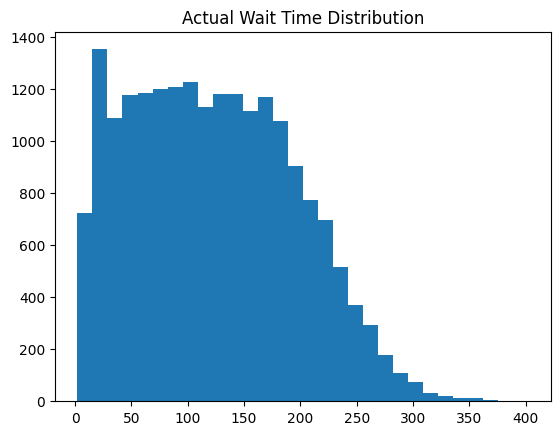

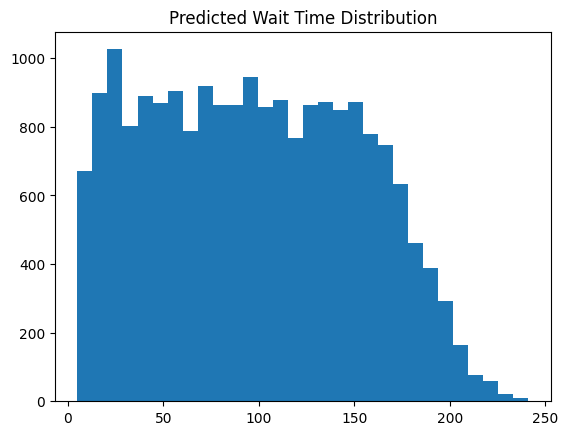

In [6]:
plt.hist(df['actual_wait'], bins=30)
plt.title("Actual Wait Time Distribution")
plt.show()

plt.hist(df['predicted_wait'], bins=30)
plt.title("Predicted Wait Time Distribution")
plt.show()

### Distribution of Actual Wait Times

Actual waiting time includes random “delay events” (price checks, coupons, etc.).  
We expect:
- slightly higher average wait  
- more variation due to random delays  

This plot helps us visually confirm that.

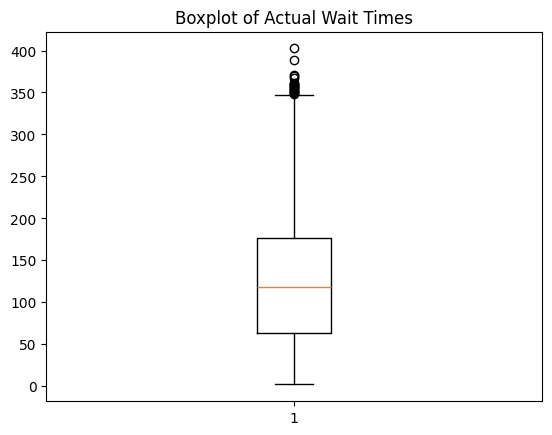

In [7]:
plt.boxplot(df['actual_wait'])
plt.title("Boxplot of Actual Wait Times")
plt.show()

### Delay Times Breakdown

Here we explore the additional delay times added to customers:  
- coupon scanning  
- price checks  
- returning items  

Plotting these delays helps us see how often they occur and how much they add to the total waiting time.

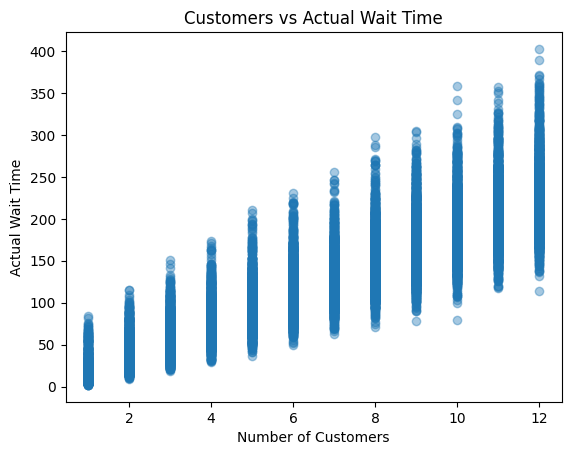

In [8]:
plt.scatter(df['customers'], df['actual_wait'], alpha=0.4)
plt.xlabel("Number of Customers")
plt.ylabel("Actual Wait Time")
plt.title("Customers vs Actual Wait Time")
plt.show()

### Summary

Overall, the dataset looks consistent and realistic:
- Queue lengths, service times, and delays follow the ranges we designed.
- Predicted and actual waiting times are strongly correlated but not identical, which is good.
- Random delays introduce meaningful noise, making the environment non-trivial for RL.
- No missing values or structural issues were found.

The dataset is ready to be used for training and evaluating our Q-learning agent.